In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/uber-rides-dataset.csv')
df=df.loc[:,['total_time','trip_status','price_usd','distance_kms','temperature_value',
             'feels_like','humidity','wind_speed','cloudness','weather_main',
             'weather_desc','precipitation']]
df=df[df['trip_status']=='Completed']
df=df.drop('trip_status',axis=1)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 677
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_time         668 non-null    object 
 1   price_usd          668 non-null    float64
 2   distance_kms       668 non-null    float64
 3   temperature_value  668 non-null    int64  
 4   feels_like         668 non-null    int64  
 5   humidity           668 non-null    float64
 6   wind_speed         668 non-null    float64
 7   cloudness          668 non-null    object 
 8   weather_main       668 non-null    object 
 9   weather_desc       668 non-null    object 
 10  precipitation      668 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 62.6+ KB
None


,total_time,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,00:29:00,5.17,9.29,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,00:26:00,4.97,9.93,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,01:23:00,13.01,18.01,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,00:20:00,25.99,5.10,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,00:49:00,13.43,21.92,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none
...,...,...,...,...,...,...,...,...,...,...,...
673,00:12:00,2.60,5.79,6,4,0.39,2.57,0.18,clear-day,Clear,none
674,00:37:00,3.92,11.46,7,3,0.62,5.37,0.48,partly-cloudy-day,Partly Cloudy,none
675,00:35:00,2.78,6.68,8,6,0.76,4.02,0.9,partly-cloudy-day,Mostly Cloudy,none
676,00:23:00,3.33,7.48,9,7,0.68,4.28,0.79,partly-cloudy-day,Mostly Cloudy,none


<ipython-input-5-4dc68dfdecaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price_usd)


<Axes: xlabel='price_usd', ylabel='Density'>

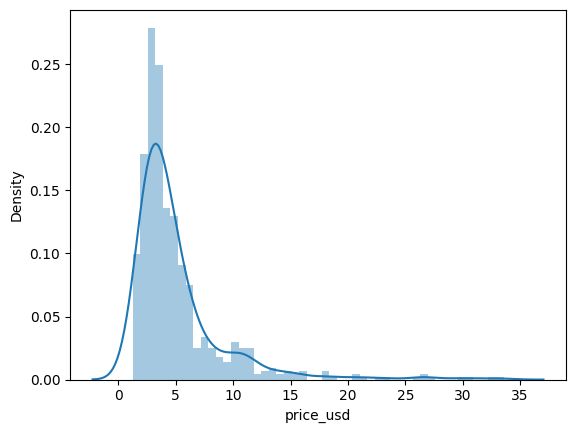

In [ ]:
import seaborn as sns
sns.distplot(df.price_usd)


In [ ]:
!pip install smogn
import smogn

def oversample(df):
  c=smogn.smoter(
      data=df,
      y='price_usd',
      samp_method = 'extreme',
      rel_thres = 0.80
  )
  return c
print(df.shape)
df=oversample(df)
print(df.shape)
df=oversample(df)
print(df.shape)
df=oversample(df)
print(df.shape)
df

(668, 11)


r_index: 100%|##########| 36/36 [00:00<00:00, 63.60it/s]


(1039, 11)


synth_matrix: 100%|##########| 148/148 [00:02<00:00, 53.00it/s]


(1495, 11)


r_index: 100%|##########| 82/82 [00:00<00:00, 824.46it/s]

(2442, 11)


,total_time,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,01:14:00,26.836976,31.752410,19.865760,19.865760,0.725563,3.939362,0.25,partly-cloudy-night,Partly Cloudy,none
1,01:14:00,26.886430,31.735369,19.876963,19.790236,0.725541,3.938449,0.25,partly-cloudy-night,Partly Cloudy,none
2,01:14:00,26.886430,31.656834,19.883231,19.540908,0.724125,3.931144,0.25,partly-cloudy-night,Partly Cloudy,none
3,01:14:00,26.836976,31.740816,19.842095,19.842095,0.725072,3.937554,0.25,partly-cloudy-night,Partly Cloudy,none
4,01:14:00,26.886430,31.575754,19.889703,19.283502,0.722663,3.923603,0.25,partly-cloudy-night,Partly Cloudy,none
...,...,...,...,...,...,...,...,...,...,...,...
671,00:36:00,4.550000,7.970000,10.000000,8.000000,0.690000,3.830000,0.6,partly-cloudy-day,Mostly Cloudy,none
672,00:15:00,2.800000,4.260000,5.000000,2.000000,0.450000,2.840000,0.21,clear-day,Clear,none
673,00:12:00,2.600000,5.790000,6.000000,4.000000,0.390000,2.570000,0.18,clear-day,Clear,none
675,00:35:00,2.780000,6.680000,8.000000,6.000000,0.760000,4.020000,0.9,partly-cloudy-day,Mostly Cloudy,none


<ipython-input-9-b078d3edb391>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price_usd)


,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed
count,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000
mean,20.158023,20.625596,9.744162,9.266450,0.756763,3.377140
std,13.155847,12.788543,8.465434,9.270964,0.156040,1.665441
min,1.250000,0.290000,-22.000000,-29.000000,0.288971,0.050000
25%,7.660173,7.478582,2.000000,0.000000,0.662548,2.153370
50%,18.662309,21.253795,13.000000,12.494103,0.770676,3.294972
75%,27.280826,30.867220,16.547956,16.909717,0.872111,4.597053
max,72.807367,46.221025,28.000000,30.000000,1.001054,8.410000


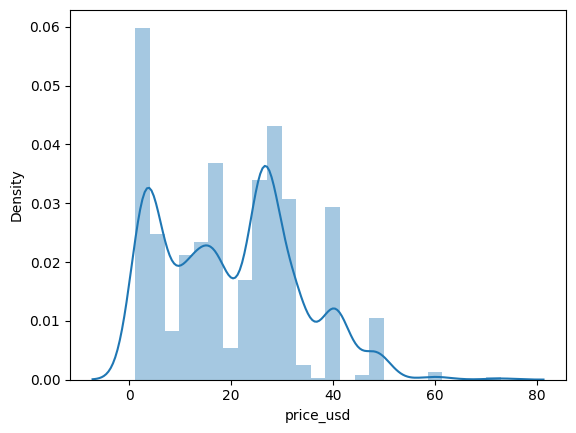

In [ ]:
sns.distplot(df.price_usd)
df.describe()

In [ ]:
print(df['cloudness'].unique())
print(df['weather_main'].unique())
print(df['weather_desc'].unique())
print(df['precipitation'].unique())
print(df.info())

[0.99 0.75 1.   0.98 0.   0.86 0.89 0.84 0.39 0.58 0.94 0.78 0.76 0.62
 0.46 0.31 0.79 0.83 0.69 0.88 0.95 0.63 0.92 0.9  0.8  0.81 0.97 0.27
 0.77 0.6  0.03 0.38 0.34 0.73 0.59 0.36 0.53 0.47 0.96 0.87 0.24 0.72
 0.54 0.7  0.16 0.71 0.91 0.49 0.68 0.32 0.43 0.52 0.14 0.19 0.82 0.64
 0.55 0.35 0.09 0.05 0.93 0.42 0.67 0.61 0.25 0.33 0.07 0.26 0.41 0.48
 0.15 0.17 0.65 0.21 0.18]
['fog' 'partly-cloudy-day' 'cloudy' 'clear-day' 'partly-cloudy-night'
 'wind' 'clear-night' 'rain' 'snow']
['Foggy' 'Mostly Cloudy' 'Overcast' 'Clear' 'Partly Cloudy'
 'Breezy and Mostly Cloudy' 'Light Rain' 'Breezy and Partly Cloudy'
 'Breezy' 'Drizzle' 'Flurries']
['rain' 'none' 'snow']
<class 'pandas.core.frame.DataFrame'>
Index: 2287 entries, 0 to 677
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_time         2287 non-null   object 
 1   price_usd          2287 non-null   float64
 2   distance_kms       2287 non-nu

In [ ]:
# print(df[df['cloudness']=='Node Not Available'])
df=df[df['cloudness']!='Node Not Available']
df['cloudness']=df['cloudness'].astype('float64')
df

,total_time,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,01:14:00,26.836976,31.752410,19.865760,19.865760,0.725563,3.939362,0.25,partly-cloudy-night,Partly Cloudy,none
1,01:14:00,26.886430,31.735369,19.876963,19.790236,0.725541,3.938449,0.25,partly-cloudy-night,Partly Cloudy,none
2,01:14:00,26.886430,31.656834,19.883231,19.540908,0.724125,3.931144,0.25,partly-cloudy-night,Partly Cloudy,none
3,01:14:00,26.836976,31.740816,19.842095,19.842095,0.725072,3.937554,0.25,partly-cloudy-night,Partly Cloudy,none
4,01:14:00,26.886430,31.575754,19.889703,19.283502,0.722663,3.923603,0.25,partly-cloudy-night,Partly Cloudy,none
...,...,...,...,...,...,...,...,...,...,...,...
671,00:36:00,4.550000,7.970000,10.000000,8.000000,0.690000,3.830000,0.60,partly-cloudy-day,Mostly Cloudy,none
672,00:15:00,2.800000,4.260000,5.000000,2.000000,0.450000,2.840000,0.21,clear-day,Clear,none
673,00:12:00,2.600000,5.790000,6.000000,4.000000,0.390000,2.570000,0.18,clear-day,Clear,none
675,00:35:00,2.780000,6.680000,8.000000,6.000000,0.760000,4.020000,0.90,partly-cloudy-day,Mostly Cloudy,none


In [ ]:
weather_main_values=df['weather_main'].unique()
weather_desc_values=df['weather_desc'].unique()
precipitation_values=df['precipitation'].unique()
print(weather_main_values)
print(weather_desc_values)
print(precipitation_values)
from sklearn.preprocessing import LabelEncoder
df['weather_main']=df['weather_main'].astype('category')
df['weather_desc']=df['weather_desc'].astype('category')
df['precipitation']=df['precipitation'].astype('category')
type_encode=LabelEncoder()
df['weather_main']=type_encode.fit_transform(df['weather_main'])
print(type_encode.classes_)
df['weather_desc']=type_encode.fit_transform(df['weather_desc'])
print(type_encode.classes_)
df['precipitation']=type_encode.fit_transform(df['precipitation'])
print(type_encode.classes_)
df.info()

['partly-cloudy-night' 'cloudy' 'clear-day' 'partly-cloudy-day' 'wind'
 'clear-night' 'fog' 'rain' 'snow']
['Partly Cloudy' 'Overcast' 'Clear' 'Mostly Cloudy'
 'Breezy and Mostly Cloudy' 'Breezy and Partly Cloudy' 'Foggy'
 'Light Rain' 'Breezy' 'Drizzle' 'Flurries' 'Breezy and Overcast'
 'Light Snow']
['none' 'rain' 'snow']
['clear-day' 'clear-night' 'cloudy' 'fog' 'partly-cloudy-day'
 'partly-cloudy-night' 'rain' 'snow' 'wind']
['Breezy' 'Breezy and Mostly Cloudy' 'Breezy and Overcast'
 'Breezy and Partly Cloudy' 'Clear' 'Drizzle' 'Flurries' 'Foggy'
 'Light Rain' 'Light Snow' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy']
['none' 'rain' 'snow']
<class 'pandas.core.frame.DataFrame'>
Index: 2441 entries, 0 to 676
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_time         2441 non-null   object 
 1   price_usd          2441 non-null   float64
 2   distance_kms       2441 non-null   float64
 3   tem

In [ ]:
time_components = df['total_time'].str.split(':', expand=True)

hours = pd.to_numeric(time_components[0])
minutes = pd.to_numeric(time_components[1])
seconds = pd.to_numeric(time_components[2])

df['time_taken_minutes'] = hours * 60 + minutes + seconds / 60
df=df.drop(['total_time'],axis=1)
df

,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation,time_taken_minutes
0,26.836976,31.752410,19.865760,19.865760,0.725563,3.939362,0.25,5,12,0,74.0
1,26.886430,31.735369,19.876963,19.790236,0.725541,3.938449,0.25,5,12,0,74.0
2,26.886430,31.656834,19.883231,19.540908,0.724125,3.931144,0.25,5,12,0,74.0
3,26.836976,31.740816,19.842095,19.842095,0.725072,3.937554,0.25,5,12,0,74.0
4,26.886430,31.575754,19.889703,19.283502,0.722663,3.923603,0.25,5,12,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...
671,4.550000,7.970000,10.000000,8.000000,0.690000,3.830000,0.60,4,10,0,36.0
672,2.800000,4.260000,5.000000,2.000000,0.450000,2.840000,0.21,0,4,0,15.0
673,2.600000,5.790000,6.000000,4.000000,0.390000,2.570000,0.18,0,4,0,12.0
675,2.780000,6.680000,8.000000,6.000000,0.760000,4.020000,0.90,4,10,0,35.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2441 entries, 0 to 676
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_usd           2441 non-null   float64
 1   distance_kms        2441 non-null   float64
 2   temperature_value   2441 non-null   float64
 3   feels_like          2441 non-null   float64
 4   humidity            2441 non-null   float64
 5   wind_speed          2441 non-null   float64
 6   cloudness           2441 non-null   float64
 7   weather_main        2441 non-null   int64  
 8   weather_desc        2441 non-null   int64  
 9   precipitation       2441 non-null   int64  
 10  time_taken_minutes  2441 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 293.4 KB


In [ ]:
X=df.drop(['price_usd'],axis=1)
y=df['price_usd']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=42)
regressor.fit(X, y)

feature_importances = pd.Series(regressor.feature_importances_, index=X.columns)

sorted_feature_importances = feature_importances.sort_values(ascending=False)

print(sorted_feature_importances)
print(regressor.feature_importances_)

distance_kms          0.529930
humidity              0.202923
wind_speed            0.166265
feels_like            0.059572
temperature_value     0.032934
cloudness             0.003547
time_taken_minutes    0.002264
weather_main          0.001821
weather_desc          0.000706
precipitation         0.000038
dtype: float64
[5.29929989e-01 3.29340988e-02 5.95717549e-02 2.02923381e-01
 1.66264595e-01 3.54742232e-03 1.82089072e-03 7.06091002e-04
 3.79856686e-05 2.26379146e-03]


In [ ]:
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
reg_lr.fit(X, y)

coefficients_lr = reg_lr.coef_

print("Linear Regression coefficients:", coefficients_lr)

feature_names_lr = X.columns

for feature, coef in zip(feature_names_lr, coefficients_lr):
    print(feature, ":", coef)



from sklearn.tree import DecisionTreeRegressor

reg_dt = DecisionTreeRegressor(random_state=42)
reg_dt.fit(X, y)

feature_importances_dt = reg_dt.feature_importances_

print("Decision Tree feature importances:", feature_importances_dt)

feature_names_dt = X.columns

for feature, importance in zip(feature_names_dt, feature_importances_dt):
    print(feature, ":", importance)



from sklearn.ensemble import GradientBoostingRegressor

reg_gb = GradientBoostingRegressor(random_state=42)
reg_gb.fit(X, y)

feature_importances_gb = reg_gb.feature_importances_

print("Gradient Boosting feature importances:", feature_importances_gb)

feature_names_gb = X.columns

for feature, importance in zip(feature_names_gb, feature_importances_gb):
    print(feature, ":", importance)


Linear Regression coefficients: [ 2.85967623e-01 -1.99992567e+00  1.91926663e+00 -3.18679440e+01
 -1.07984384e+00  1.56245663e+01 -3.98745204e-01 -4.96554866e-01
  3.35787127e+00  2.93793379e-02]
distance_kms : 0.28596762293206035
temperature_value : -1.9999256692209217
feels_like : 1.919266627645194
humidity : -31.867944004991376
wind_speed : -1.0798438409809314
cloudness : 15.624566301244068
weather_main : -0.39874520393655877
weather_desc : -0.4965548663345204
precipitation : 3.3578712699723305
time_taken_minutes : 0.029379337861221416
Decision Tree feature importances: [3.51248383e-01 8.03773888e-02 2.12799488e-02 2.12283438e-01
 3.30800009e-01 1.39684546e-03 2.83195224e-04 1.14678296e-03
 6.71959877e-04 5.12047784e-04]
distance_kms : 0.35124838348739146
temperature_value : 0.08037738877704072
feels_like : 0.021279948753634422
humidity : 0.2122834383368166
wind_speed : 0.3308000093370548
cloudness : 0.0013968454634877003
weather_main : 0.00028319522436661424
weather_desc : 0.001146

In [ ]:
df=df.drop(['time_taken_minutes','cloudness','weather_main','weather_desc','precipitation'],axis=1)
df

In [ ]:
print(df.shape)
df=oversample(df)
print(df.shape)

(2441, 11)


r_index: 100%|##########| 23/23 [00:00<00:00, 412.94it/s]

(4765, 11)


In [ ]:
X=df.drop(['price_usd'],axis=1)
y=df['price_usd']
X

,distance_kms,temperature_value,feels_like,humidity,wind_speed
0,5.256166,2.0,2.0,0.845658,0.879555
1,5.256166,2.0,2.0,0.845658,0.879555
2,5.256166,2.0,2.0,0.845658,0.879555
3,5.256166,2.0,2.0,0.845658,0.879555
4,5.256166,2.0,2.0,0.845658,0.879555
...,...,...,...,...,...
671,7.970000,10.0,8.0,0.690000,3.830000
672,4.260000,5.0,2.0,0.450000,2.840000
673,5.790000,6.0,4.0,0.390000,2.570000
675,6.680000,8.0,6.0,0.760000,4.020000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

def error(y_test,y_pred):
  RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  squared = r2_score(y_test, y_pred)
  print(RMSE)
  print(squared)

In [ ]:
from sklearn import linear_model

linear_regression=linear_model.LinearRegression()

linear_regression.fit(x_train,y_train)

y_pred=linear_regression.predict(x_test)

print("Linear Regression Accuracy : ",linear_regression.score(x_test,y_test))

Linear Regression Accuracy :  0.2410269765642209


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline_order=[
    (
        'scaler',StandardScaler()
    ),
    (
        'linear_reg',linear_model.LinearRegression()
    )
]

pipeline=Pipeline(pipeline_order)

linear_reg_scaled=pipeline.fit(x_train,y_train)

linear_reg_scaled.score(x_test,y_test)


0.24102697656422056

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg=DecisionTreeRegressor(max_depth=10,min_samples_leaf=0.1,random_state=50)

dt_reg.fit(x_train,y_train)

dt_reg.score(x_test,y_test)


0.5182428628533637

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=50)

rf.fit(x_train,y_train)

rf.score(x_test,y_test)

y_pred=rf.predict(x_test)

# error(y_test,y_pred)

rf.score(x_test,y_test)


0.8635750528371542

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(max_depth=5,n_estimators=100,learning_rate=0.1,random_state=50)

gb_reg.fit(x_train,y_train)

gb_reg.score(x_test,y_test)

0.8515268140934052

In [ ]:
from sklearn.ensemble import VotingRegressor

models=[
    (
      'Decision Tree',dt_reg
    ),
    (
        'Random Forest',rf
    ),
    (
        'Gradient Boosting Regressor',gb_reg
    )
]

voting_model=VotingRegressor(estimators=models)

voting_model.fit(x_train,y_train)

voting_model.score(x_test,y_test)

0.8186485466315542

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')

svr.fit(x_train,y_train)

svr.score(x_test,y_test)

0.33783262822034377

In [ ]:
start = 0.1
end = 1.0
step = 0.1

for i in range(int(start * 10), int(end * 10), int(step * 10)):
    size=i / 10

    print("Test Size : ",size)

    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)



    from sklearn import linear_model

    linear_regression=linear_model.LinearRegression()

    linear_regression.fit(x_train,y_train)

    y_pred=linear_regression.predict(x_test)

    print("Linear Regression Accuracy : ",linear_regression.score(x_test,y_test))



    from sklearn.tree import DecisionTreeRegressor

    dt_reg=DecisionTreeRegressor(max_depth=10,min_samples_leaf=0.1,random_state=50)

    dt_reg.fit(x_train,y_train)

    print("Decision Tree Regression Accuracy : ",dt_reg.score(x_test,y_test))



    from sklearn.ensemble import RandomForestRegressor

    rf = RandomForestRegressor(n_estimators=200,random_state=50)

    rf.fit(x_train,y_train)

    rf.score(x_test,y_test)

    y_pred=rf.predict(x_test)

    print("Random Forest Regression Accuracy : ",rf.score(x_test,y_test))



    from sklearn.ensemble import GradientBoostingRegressor

    gb_reg=GradientBoostingRegressor(max_depth=5,n_estimators=100,learning_rate=0.1,random_state=50)

    gb_reg.fit(x_train,y_train)

    print("Gradient Boosting Regression Accuracy : ",gb_reg.score(x_test,y_test))



    from sklearn.ensemble import VotingRegressor

    models=[
        (
            'Random Forest',rf
        ),
        (
            'Gradient Boosting Regressor',gb_reg
        )
    ]

    voting_model=VotingRegressor(estimators=models)

    voting_model.fit(x_train,y_train)

    print("Voting Model Accuracy : ",voting_model.score(x_test,y_test))

Test Size :  0.1
Linear Regression Accuracy :  0.38157851663107856
Decision Tree Regression Accuracy :  0.7547503080706269
Random Forest Regression Accuracy :  0.9862975581787523
Gradient Boosting Regression Accuracy :  0.9845795876446121
Voting Model Accuracy :  0.9861667743452149
Test Size :  0.2
Linear Regression Accuracy :  0.38673567373511364
Decision Tree Regression Accuracy :  0.7967912039857192
Random Forest Regression Accuracy :  0.9815367177584147
Gradient Boosting Regression Accuracy :  0.9802335183154208
Voting Model Accuracy :  0.9816126087679415
Test Size :  0.3
Linear Regression Accuracy :  0.3984591763677713
Decision Tree Regression Accuracy :  0.7830924613426986
Random Forest Regression Accuracy :  0.9806670642427786
Gradient Boosting Regression Accuracy :  0.9789658336014563
Voting Model Accuracy :  0.9805030944221514
Test Size :  0.4
Linear Regression Accuracy :  0.3980961416273521
Decision Tree Regression Accuracy :  0.7819214719033863
Random Forest Regression Accur

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


print("Train Data : ",x_train.shape)
print("Test Data : ",x_test.shape)



from sklearn import linear_model

linear_regression=linear_model.LinearRegression()

linear_regression.fit(x_train,y_train)

y_pred=linear_regression.predict(x_test)

print("Linear Regression Accuracy : ",linear_regression.score(x_test,y_test))



from sklearn.tree import DecisionTreeRegressor

dt_reg=DecisionTreeRegressor(max_depth=10,min_samples_leaf=0.1,random_state=50)

dt_reg.fit(x_train,y_train)

print("Decision Tree Regression Accuracy : ",dt_reg.score(x_test,y_test))



from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=50)

rf.fit(x_train,y_train)

rf.score(x_test,y_test)

y_pred=rf.predict(x_test)

# error(y_test,y_pred)

print("Random Forest Regression Accuracy : ",rf.score(x_test,y_test))



from sklearn.ensemble import GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(max_depth=5,n_estimators=100,learning_rate=0.1,random_state=50)

gb_reg.fit(x_train,y_train)

print("Gradient Boosting Regression Accuracy : ",gb_reg.score(x_test,y_test))



from sklearn.ensemble import VotingRegressor

models=[
(
'Random Forest',rf
),
(
'Gradient Boosting Regressor',gb_reg
)
]

voting_model=VotingRegressor(estimators=models)

voting_model.fit(x_train,y_train)

print("Voting Model Accuracy : ",voting_model.score(x_test,y_test))



from sklearn.svm import SVR

svr = SVR(kernel='rbf')

svr.fit(x_train,y_train)

print("Support Vector Regressor Accuracy : ",svr.score(x_test,y_test))

Train Data :  (2382, 5)
Test Data :  (2383, 5)
Linear Regression Accuracy :  0.39067693732693964
Decision Tree Regression Accuracy :  0.826744996677887
Random Forest Regression Accuracy :  0.9816418235915666
Gradient Boosting Regression Accuracy :  0.9805687468474515
Voting Model Accuracy :  0.9820130245888355
Support Vector Regressor Accuracy :  0.3147996857662133


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")



def average(rfr,gbr,vm):
  print("Random Forest Regression : ",rfr)
  print("Gradient Boosting Regression : ",gbr)
  print("Voting Model : ",vm)
  return (rfr+gbr+vm)/3



rfr=rf.predict([[10.4,37.45,40.35,32,3.39]])
gbr=gb_reg.predict([[10.4,37.45,40.35,32,3.39]])
vm=voting_model.predict([[10.4,37.45,40.35,32,3.39]])
print(average(rfr,gbr,vm))

Random Forest Regression :  [7.47533759]
Gradient Boosting Regression :  [8.60747754]
Voting Model :  [8.04140756]
[8.04140756]


In [ ]:
import pickle

filename = '/content/drive/MyDrive/Machine Learning/ml_cbp_random_forest_98.sav'

with open(filename, 'wb') as file:
    pickle.dump(voting_model, file)

In [ ]:
df.describe()

,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed
count,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000
mean,40.049410,21.507256,12.101779,11.964864,0.710832,3.546562
std,22.883931,11.297108,8.236318,8.812290,0.149053,1.712178
min,1.250000,0.290000,-22.000000,-29.000000,0.288971,0.310000
25%,23.388741,12.635000,2.426004,2.000000,0.660163,2.270791
50%,40.712120,21.575713,15.000000,15.033421,0.720011,3.319938
75%,61.055543,29.658583,19.000000,20.000000,0.839046,5.246187
max,109.211051,46.221025,28.000000,30.000000,1.001054,8.100000


In [ ]:
df.to_csv('/content/drive/MyDrive/Machine Learning/ml_cbp_oversampled_data.csv')
# df

In [ ]:
from geopy.geocoders import Nominatim
locator=Nominatim(user_agent='mygeocoder')

In [ ]:
print(locator.geocode("VNRVJIET"))

VNRVJIET Womens Basketball Court, Hanuman Marg, Sai Nagar, Bachupally mandal, Medchal–Malkajgiri District, Telangana, 500090, India


In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

latitude=17.4834
longitude=78.3871

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": latitude,
	"longitude": longitude,
	"current": ["temperature_2m", "relative_humidity_2m", "apparent_temperature", "wind_speed_10m"],
	"hourly": ["temperature_2m", "relative_humidity_2m", "apparent_temperature", "wind_speed_10m"],
	"timeformat": "unixtime"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_temperature_2m = current.Variables(0).Value()
current_relative_humidity_2m = current.Variables(1).Value()
current_apparent_temperature = current.Variables(2).Value()
current_wind_speed_10m = current.Variables(3).Value()

print(f"Current time {current.Time()}")
print(f"Current temperature_2m {current_temperature_2m}")
print(f"Current relative_humidity_2m {current_relative_humidity_2m}")
print(f"Current apparent_temperature {current_apparent_temperature}")
print(f"Current wind_speed_10m {current_wind_speed_10m}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(2).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(3).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe

Coordinates 17.5°N 78.375°E
Elevation 583.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Current time 1714122900
Current temperature_2m 39.900001525878906
Current relative_humidity_2m 16.0
Current apparent_temperature 39.251102447509766
Current wind_speed_10m 8.279999732971191


,date,temperature_2m,apparent_temperature,relative_humidity_2m,wind_speed_10m
0,2024-04-26 00:00:00+00:00,27.576500,27.819626,41.0,5.154416
1,2024-04-26 01:00:00+00:00,27.526499,27.791954,41.0,4.896529
2,2024-04-26 02:00:00+00:00,29.426498,29.713814,37.0,5.014219
3,2024-04-26 03:00:00+00:00,32.176498,31.975452,29.0,5.351785
4,2024-04-26 04:00:00+00:00,35.026501,34.151653,23.0,10.966713
...,...,...,...,...,...
163,2024-05-02 19:00:00+00:00,29.676498,27.673069,19.0,3.415260
164,2024-05-02 20:00:00+00:00,29.176498,27.428543,21.0,3.054701
165,2024-05-02 21:00:00+00:00,28.626499,26.898258,22.0,3.219938
166,2024-05-02 22:00:00+00:00,27.676498,25.890633,23.0,3.396233
